In [215]:
import pandas as pd
import re
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
scraping_df = pd.read_csv("../data/scraped_anime_data_final_protected.csv")
animes_df = pd.read_csv("../data/animes.csv")
animes_df = animes_df.drop_duplicates(subset=['uid'], keep='first')

scraping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16216 entries, 0 to 16215
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   uid                  16216 non-null  int64 
 1   Type                 16054 non-null  object
 2   Producers            16216 non-null  object
 3   Studios              16216 non-null  object
 4   Source               16054 non-null  object
 5   Themes               16216 non-null  object
 6   Demographic          5348 non-null   object
 7   Duration             16054 non-null  object
 8   Favorites            16054 non-null  object
 9   Streaming Platforms  16216 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [217]:
scraping_df

,uid,Type,Producers,Studios,Source,Themes,Demographic,Duration,Favorites,Streaming Platforms
0,28891,TV,"['Dentsu', 'Mainichi Broadcasting System', 'Mo...",['Production I.G'],Manga,"['School', 'Team Sports']",Shounen,24 min. per ep.,"15,764",['Crunchyroll']
1,23273,TV,"['Aniplex', 'Dentsu', 'Kodansha', 'Fuji TV', '...",['A-1 Pictures'],Manga,"['Love Polygon', 'Music', 'School']",Shounen,22 min. per ep.,"86,357","['Crunchyroll', 'Netflix']"
2,34599,TV,"['AT-X', 'Takeshobo', 'Sony Music Communicatio...",['Kinema Citrus'],Web manga,[],NaN,25 min. per ep.,"44,597","['Crunchyroll', 'HIDIVE', 'Netflix']"
3,5114,TV,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...",['Bones'],Manga,[],Shounen,24 min. per ep.,"227,331",['Crunchyroll']
4,31758,Movie,"['Aniplex', 'Kodansha']",['Shaft'],Light novel,[],NaN,1 hr. 23 min.,"7,588",[]
...,...,...,...,...,...,...,...,...,...,...
16211,10075,OVA,['add some'],['Pierrot'],Manga,[],Shounen,6 min.,85,[]
16212,35828,TV,"['TBS', 'Grooove', 'Nichion', 'Exit Tunes', 'O...",['8bit'],Web manga,"['Mythology', 'Pets', 'School']",NaN,24 min. per ep.,753,['Crunchyroll']
16213,10378,TV,"['TV Tokyo', 'Lantis', 'Pony Canyon', 'TV Toky...",['Diomedéa'],Manga,['Anthropomorphic'],Shounen,24 min. per ep.,178,"['Crunchyroll', 'HIDIVE']"
16214,33082,Movie,['Square Enix'],['Square Enix Visual Works'],Game,[],NaN,1 hr. 55 min.,154,[]


In [218]:
added_info_animes_df = pd.merge(animes_df, scraping_df, left_on='uid', right_on='uid', suffixes=('_anime', '_scraping'))
added_info_animes_df

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,...,link,Type,Producers,Studios,Source,Themes,Demographic,Duration,Favorites,Streaming Platforms
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,...,https://myanimelist.net/anime/28891/Haikyuu_Se...,TV,"['Dentsu', 'Mainichi Broadcasting System', 'Mo...",['Production I.G'],Manga,"['School', 'Team Sports']",Shounen,24 min. per ep.,"15,764",['Crunchyroll']
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,...,https://myanimelist.net/anime/23273/Shigatsu_w...,TV,"['Aniplex', 'Dentsu', 'Kodansha', 'Fuji TV', '...",['A-1 Pictures'],Manga,"['Love Polygon', 'Music', 'School']",Shounen,22 min. per ep.,"86,357","['Crunchyroll', 'Netflix']"
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,...,https://myanimelist.net/anime/34599/Made_in_Abyss,TV,"['AT-X', 'Takeshobo', 'Sony Music Communicatio...",['Kinema Citrus'],Web manga,[],NaN,25 min. per ep.,"44,597","['Crunchyroll', 'HIDIVE', 'Netflix']"
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,...,https://myanimelist.net/anime/5114/Fullmetal_A...,TV,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...",['Bones'],Manga,[],Shounen,24 min. per ep.,"227,331",['Crunchyroll']
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,...,https://myanimelist.net/anime/31758/Kizumonoga...,Movie,"['Aniplex', 'Kodansha']",['Shaft'],Light novel,[],NaN,1 hr. 23 min.,"7,588",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16211,10075,Naruto x UT,All-new animation offered throughout UNIQLO cl...,"['Action', 'Comedy', 'Super Power', 'Martial A...","Jan 1, 2011",1.0,34155,2382,1728.0,7.50,...,https://myanimelist.net/anime/10075/Naruto_x_UT,OVA,['add some'],['Pierrot'],Manga,[],Shounen,6 min.,85,[]
16212,35828,Miira no Kaikata,High school student Sora Kashiwagi is accustom...,"['Slice of Life', 'Comedy', 'Supernatural']","Jan 12, 2018 to Mar 30, 2018",12.0,61459,1648,1727.0,7.50,...,https://myanimelist.net/anime/35828/Miira_no_K...,TV,"['TBS', 'Grooove', 'Nichion', 'Exit Tunes', 'O...",['8bit'],Web manga,"['Mythology', 'Pets', 'School']",NaN,24 min. per ep.,753,['Crunchyroll']
16213,10378,Shinryaku!? Ika Musume,"After regaining her squid-like abilities, Ika ...","['Slice of Life', 'Comedy', 'Shounen']","Sep 27, 2011 to Dec 25, 2011",12.0,67422,1547,1548.0,7.56,...,https://myanimelist.net/anime/10378/Shinryaku_...,TV,"['TV Tokyo', 'Lantis', 'Pony Canyon', 'TV Toky...",['Diomedéa'],Manga,['Anthropomorphic'],Shounen,24 min. per ep.,178,"['Crunchyroll', 'HIDIVE']"
16214,33082,Kingsglaive: Final Fantasy XV,"For years, the Niflheim Empire and the kingdom...",['Action'],"Jul 9, 2016",1.0,41077,2154,1544.0,7.56,...,https://myanimelist.net/anime/33082/Kingsglaiv...,Movie,['Square Enix'],['Square Enix Visual Works'],Game,[],NaN,1 hr. 55 min.,154,[]


In [219]:
added_info_animes_df['Producers'] = added_info_animes_df['Producers'].apply(ast.literal_eval)
added_info_animes_df['Studios'] = added_info_animes_df['Studios'].apply(ast.literal_eval)
added_info_animes_df['Themes'] = added_info_animes_df['Themes'].apply(ast.literal_eval)
added_info_animes_df['Streaming Platforms'] = added_info_animes_df['Streaming Platforms'].apply(ast.literal_eval)

In [220]:
def replace_unknown_or_add_some(value):
    if isinstance(value, list):
        if "Unknown" in value or "add some" in value:
            return []
    return value

added_info_animes_df = added_info_animes_df.applymap(replace_unknown_or_add_some)

added_info_animes_df = added_info_animes_df.replace({"Unknown": None, "add some": None})

added_info_animes_df['Favorites'] = pd.to_numeric(added_info_animes_df['Favorites'].str.replace(',', ''), errors='coerce').fillna(0).astype(int)

def convert_duration(duration):
    if pd.isna(duration):
        return None
    hours = 0
    minutes = 0
    hr_match = re.search(r'(\d+)\s*hr', duration)
    if hr_match:
        hours = int(hr_match.group(1))
    min_match = re.search(r'(\d+)\s*min', duration)
    if min_match:
        minutes = int(min_match.group(1))
    return hours * 60 + minutes

added_info_animes_df['Duration'] = added_info_animes_df['Duration'].apply(convert_duration)

C:\Users\User\AppData\Local\Temp\ipykernel_16480\3646272971.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  added_info_animes_df = added_info_animes_df.applymap(replace_unknown_or_add_some)


In [221]:
added_info_animes_df.info()
added_info_animes_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16216 entries, 0 to 16215
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   uid                  16216 non-null  int64  
 1   title                16216 non-null  object 
 2   synopsis             15453 non-null  object 
 3   genre                16216 non-null  object 
 4   aired                16216 non-null  object 
 5   episodes             15724 non-null  float64
 6   members              16216 non-null  int64  
 7   popularity           16216 non-null  int64  
 8   ranked               14553 non-null  float64
 9   score                15875 non-null  float64
 10  img_url              16051 non-null  object 
 11  link                 16216 non-null  object 
 12  Type                 16053 non-null  object 
 13  Producers            16216 non-null  object 
 14  Studios              16216 non-null  object 
 15  Source               14016 non-null 

,uid,episodes,members,popularity,ranked,score,Duration,Favorites
count,16216.000000,15724.000000,1.621600e+04,16216.000000,14553.000000,15875.000000,15979.000000,16216.000000
mean,19858.979588,11.657975,2.759189e+04,8161.171621,7332.375318,6.346466,25.268665,625.227861
std,14197.712860,48.973125,9.388251e+04,4714.317489,4235.759134,0.972700,25.387057,5615.342234
min,1.000000,1.000000,2.500000e+01,1.000000,1.000000,1.250000,0.000000,0.000000
25%,5303.750000,1.000000,2.920000e+02,4082.000000,3659.000000,5.700000,5.000000,0.000000
50%,19856.000000,2.000000,1.839500e+03,8158.500000,7337.000000,6.370000,23.000000,4.000000
75%,34086.500000,12.000000,1.160000e+04,12243.250000,10993.000000,7.040000,27.000000,38.000000
max,40960.000000,3057.000000,1.871043e+06,16338.000000,14675.000000,9.230000,168.000000,227331.000000


In [222]:
flattened_platforms = added_info_animes_df.explode('Streaming Platforms')
top_platforms = flattened_platforms['Streaming Platforms'].value_counts().head(10).index
filtered_platforms_df = flattened_platforms[flattened_platforms['Streaming Platforms'].isin(top_platforms)]

flattened_producers = added_info_animes_df.explode('Producers')
top_producers = flattened_producers['Producers'].value_counts().head(10).index
filtered_producers_df = flattened_producers[flattened_producers['Producers'].isin(top_producers)]

flattened_studios = added_info_animes_df.explode('Studios')
top_studios = flattened_studios['Studios'].value_counts().head(10).index
filtered_studios_df = flattened_studios[flattened_studios['Studios'].isin(top_studios)]

flattened_themes = added_info_animes_df.explode('Themes')
top_themes = flattened_themes['Themes'].value_counts().head(10).index
filtered_themes_df = flattened_themes[flattened_themes['Themes'].isin(top_themes)]

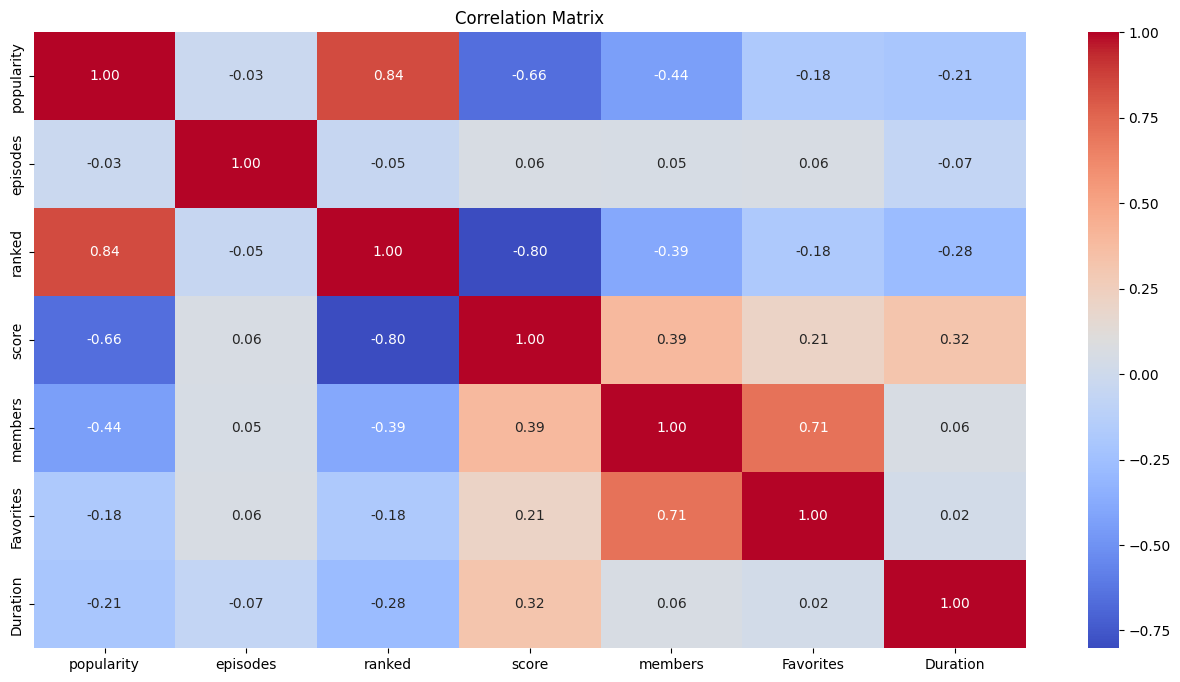

In [223]:
corr_matrix = added_info_animes_df[['popularity', 'episodes', 'ranked', 'score', 'members', 'Favorites', 'Duration']].corr()

plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

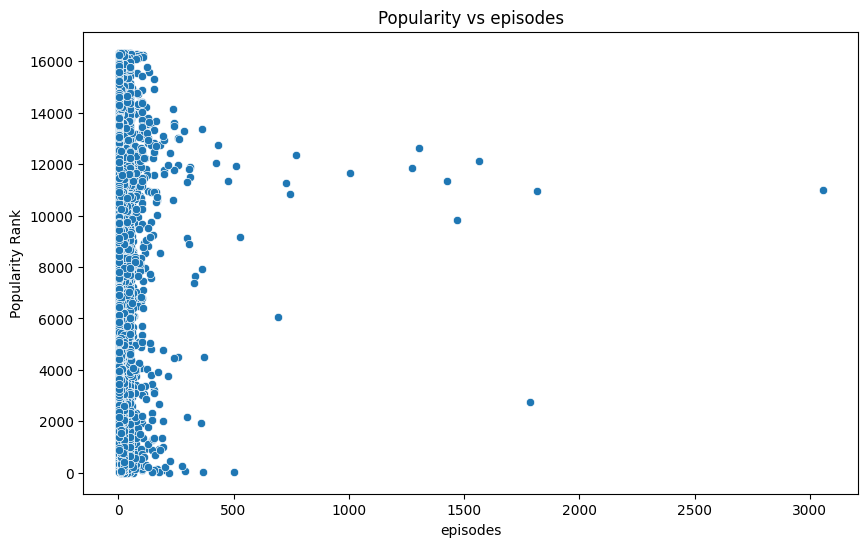

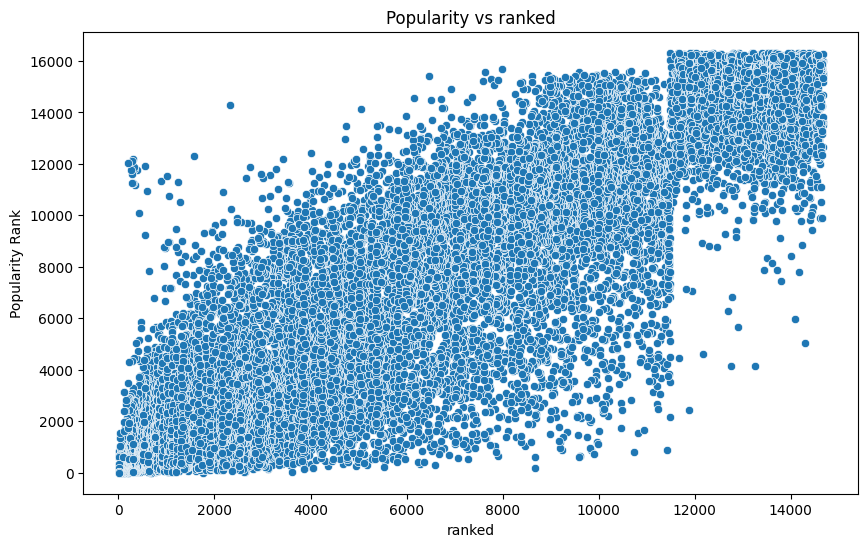

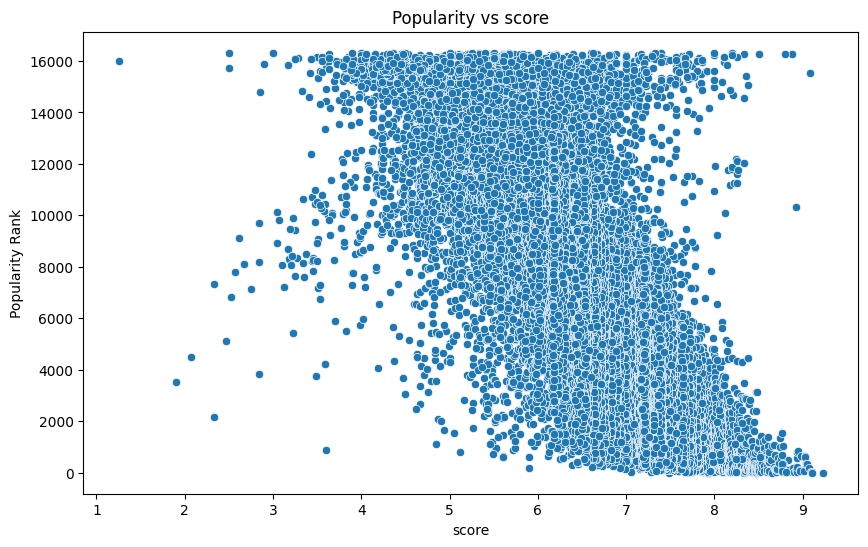

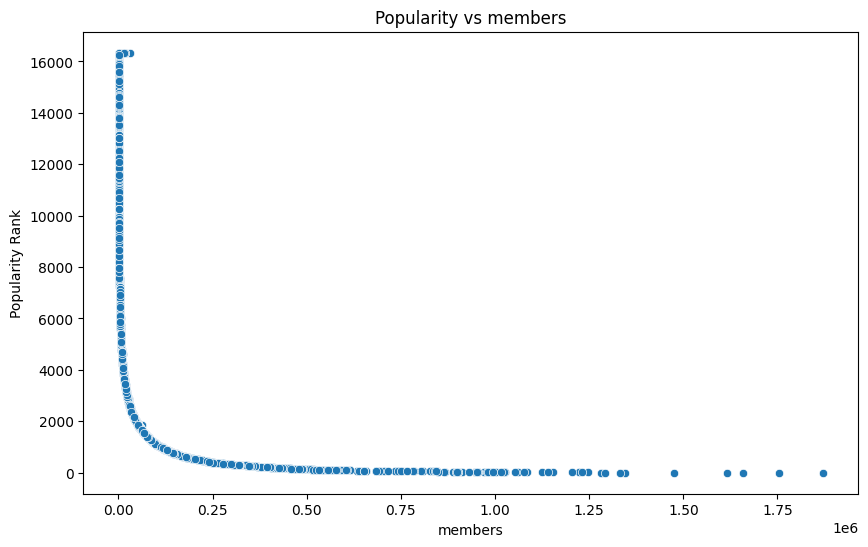

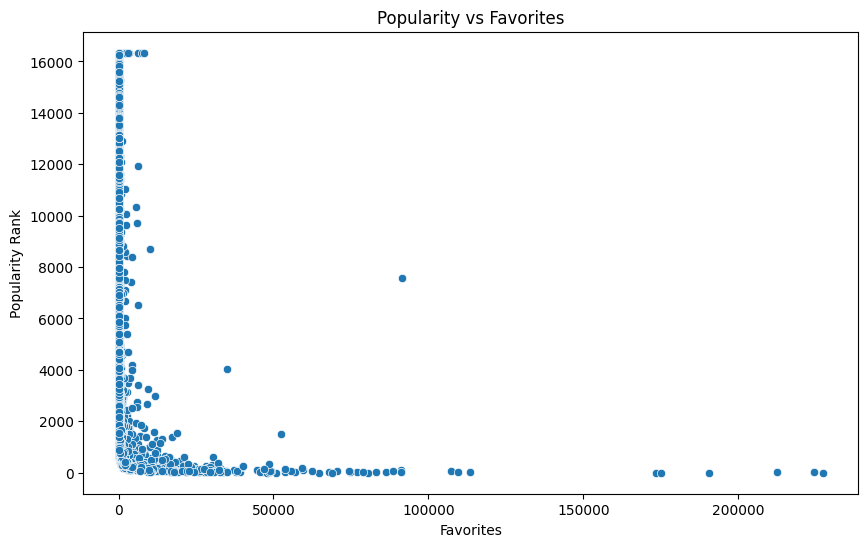

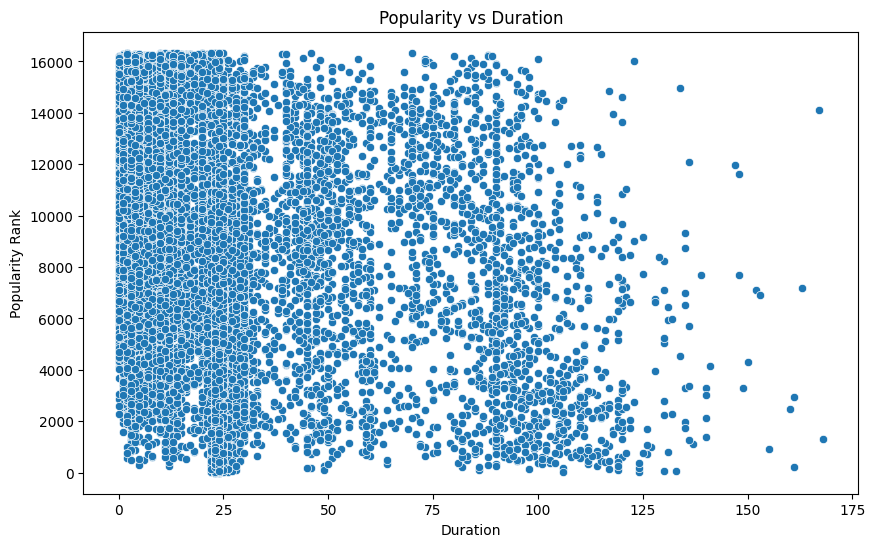

In [224]:
features = ['episodes', 'ranked', 'score', 'members', 'Favorites', 'Duration']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=added_info_animes_df[feature], y=added_info_animes_df['popularity'])
    plt.title(f'Popularity vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Popularity Rank')
    plt.show()

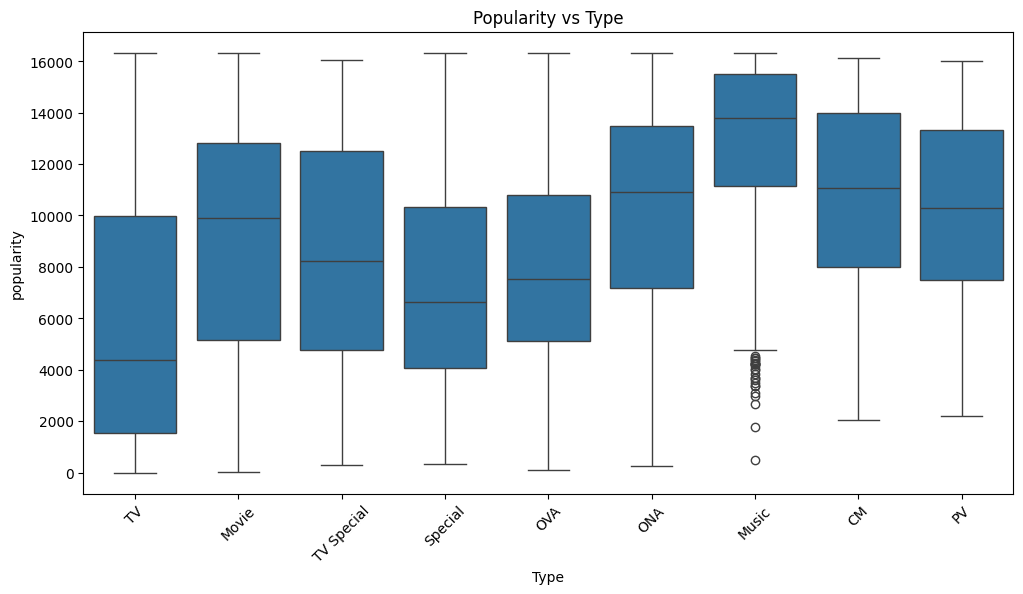

In [225]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='popularity', data=added_info_animes_df)
plt.title('Popularity vs Type')
plt.xticks(rotation=45)
plt.show()

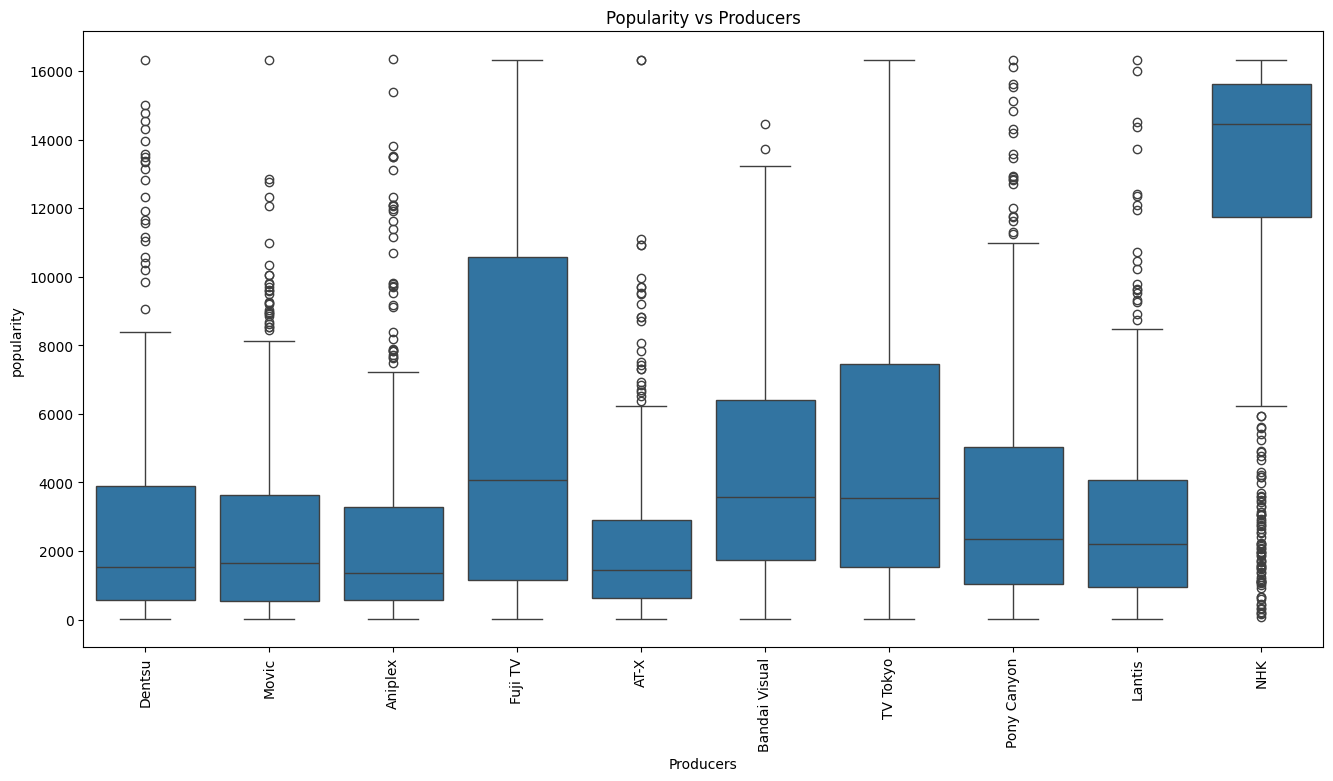

In [226]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Producers', y='popularity', data=filtered_producers_df)
plt.title('Popularity vs Producers')
plt.xticks(rotation=90)
plt.show()

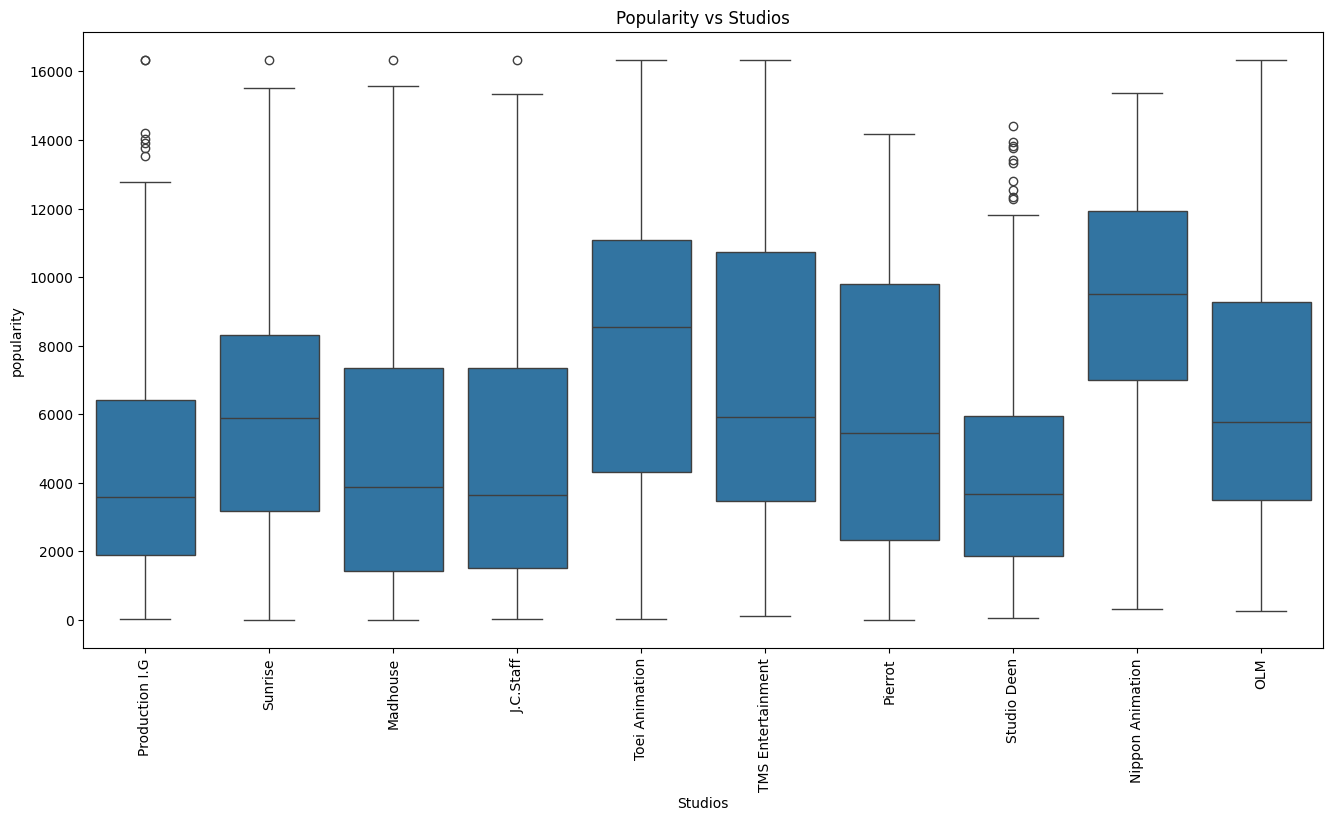

In [227]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Studios', y='popularity', data=filtered_studios_df)
plt.title('Popularity vs Studios')
plt.xticks(rotation=90)
plt.show()

In [228]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Source', y='popularity', data=added_info_animes_df)
plt.title('Popularity vs Source')
plt.xticks(rotation=45)
plt.show()

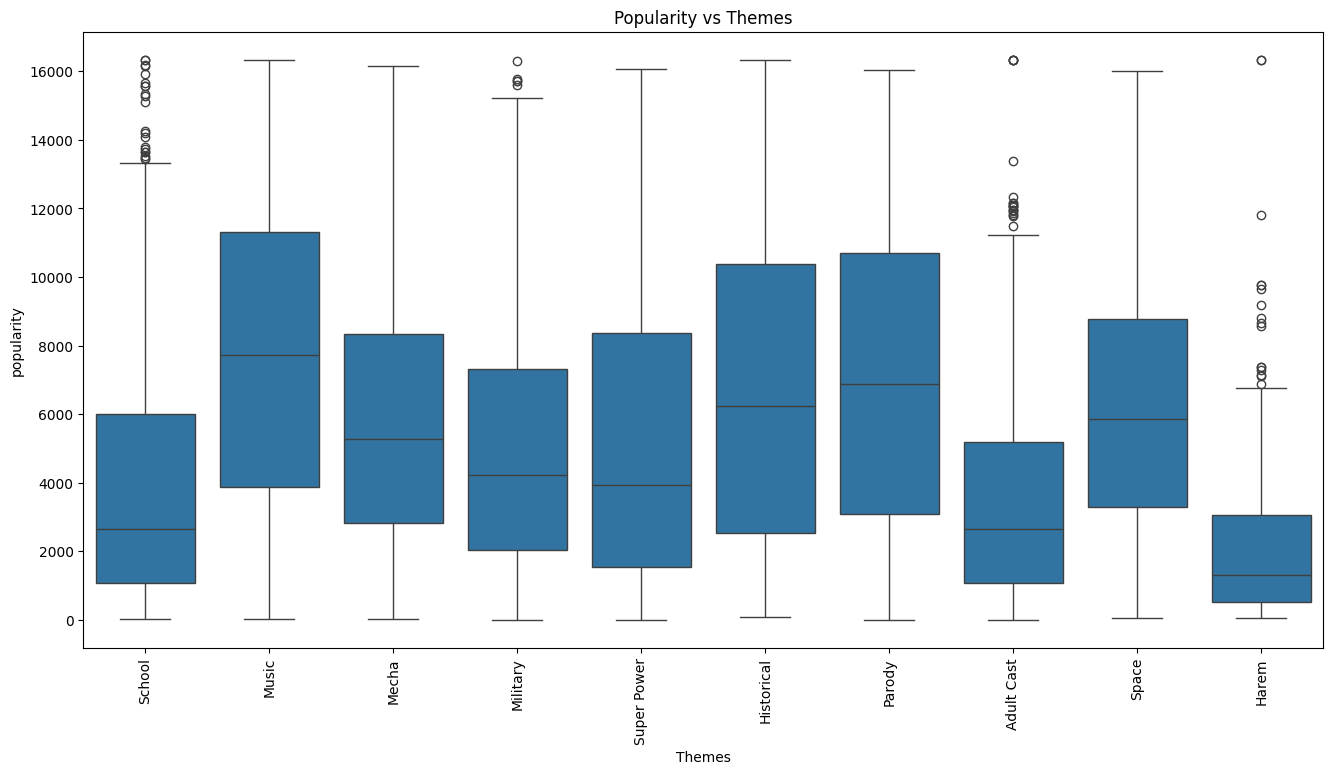

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Themes', y='popularity', data=filtered_themes_df)
plt.title('Popularity vs Themes')
plt.xticks(rotation=90)
plt.show()

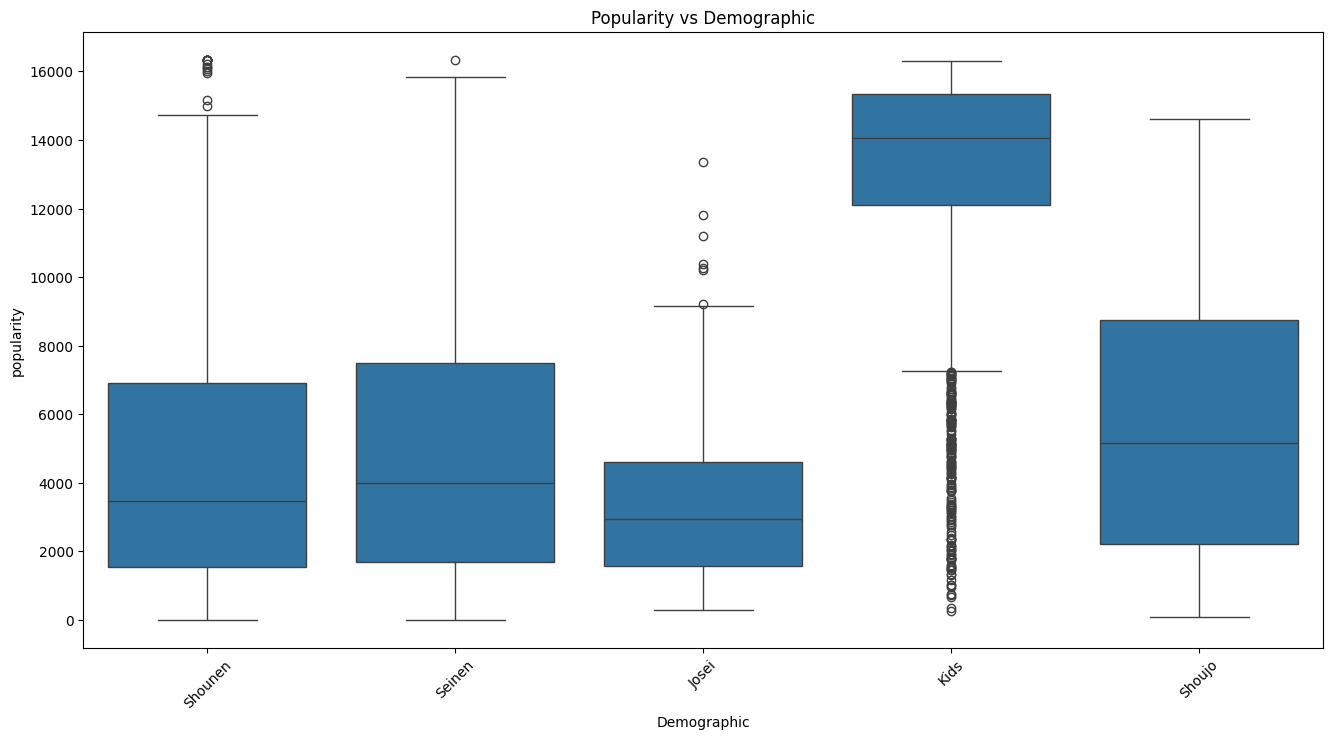

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Demographic', y='popularity', data=added_info_animes_df)
plt.title('Popularity vs Demographic')
plt.xticks(rotation=45)
plt.show()

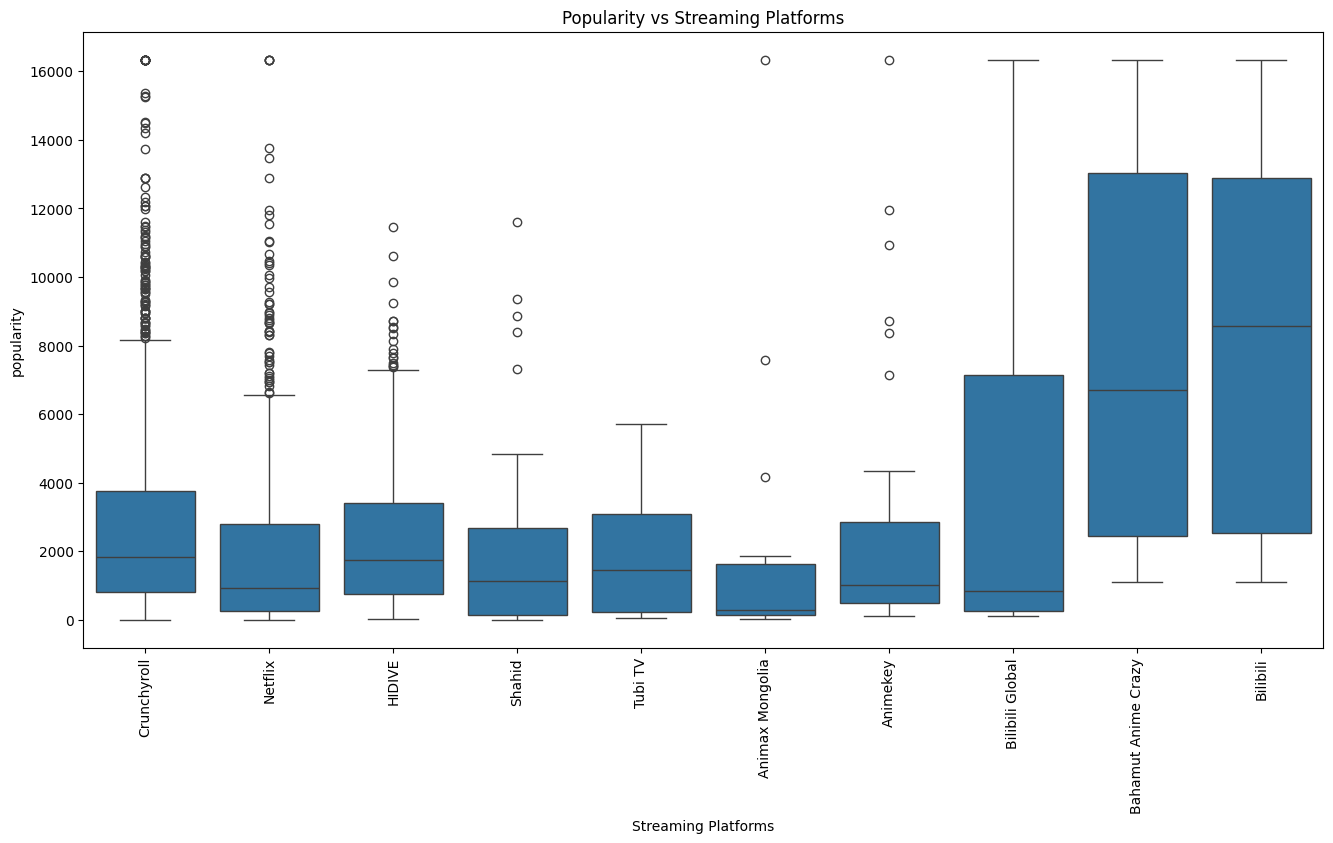

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Streaming Platforms', y='popularity', data=filtered_platforms_df)
plt.title('Popularity vs Streaming Platforms')
plt.xticks(rotation=90)
plt.show()

In [ ]:
filtered_df = added_info_animes_df[added_info_animes_df['Studios'].apply(lambda x: 'add some' in x if isinstance(x, list) else False)]

display(filtered_df)

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,...,link,Type,Producers,Studios,Source,Themes,Demographic,Duration,Favorites,Streaming Platforms
111,17949,The Everlasting Guilty Crown,"""The Everlasting Guilty Crown"" is the second s...",['Music'],"Mar 7, 2012",1.0,23109,2979,703.0,7.91,...,https://myanimelist.net/anime/17949/The_Everla...,Music,"[Sony Music Entertainment, Carp Studio]",[add some],Original,[],NaN,1.0,87,[]
196,6505,There She Is!!,"The plot revolves around Doki, a female rabbit...","['Comedy', 'Romance']","Apr 20, 2003 to Dec 9, 2008",5.0,19234,3255,615.0,7.98,...,https://myanimelist.net/anime/6505/There_She_Is,ONA,[SamBakZa],[add some],Original,[],NaN,4.0,150,[]
253,23983,Fuichin-san,Based on Ueda Toshiko's shoujo manga.,"['Drama', 'Historical', 'Kids', 'Shoujo']","Mar 20, 2004",1.0,334,11929,558.0,8.01,...,https://myanimelist.net/anime/23983/Fuichin-san,OVA,[Animaruya],[add some],Manga,[],Shoujo,60.0,0,[]
484,17603,Mr. Pen Pen,"Pen-Pen, the hat-and-tie-wearing prince of Pen...","['Comedy', 'Kids', 'Shoujo']","Mar 31, 1986",1.0,366,11813,317.0,8.20,...,https://myanimelist.net/anime/17603/Mr_Pen_Pen,TV Special,[add some],[add some],Manga,[],Kids,47.0,0,[]
488,25363,Gensei Shugoshin P-hyoro Ikka OVA,Based on Kaori Kimeki's fantasy manga serializ...,"['Adventure', 'Fantasy', 'Shoujo']","Sep 1, 1988",3.0,388,11864,315.0,8.20,...,https://myanimelist.net/anime/25363/Gensei_Shu...,OVA,"[Bandai Visual, Magic Bus]",[add some],Manga,[],Shoujo,30.0,2,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16171,33335,Hajimete no Eigo: Nippon Mukashibanashi,Old Japanese folk legends released on Japanese...,"['Kids', 'Fantasy']",Not available,18.0,389,11599,2960.0,7.20,...,https://myanimelist.net/anime/33335/Hajimete_n...,OVA,[add some],[add some],Other,[],Kids,9.0,3,[]
16193,3087,Cencoroll,"When a gigantic, unearthly monster suddenly lo...","['Action', 'Sci-Fi']","Jul 28, 2009",1.0,76715,1393,2693.0,7.26,...,https://myanimelist.net/anime/3087/Cencoroll,Movie,"[Aniplex, Think Corporation]",[add some],Original,[],NaN,26.0,281,[]
16197,30771,Mudai,Splotched in blooms of color and bursting with...,"['Drama', 'Music', 'Romance', 'Slice of Life']","May 7, 2015",1.0,3637,6537,2513.0,7.31,...,https://myanimelist.net/anime/30771/Mudai,Music,[pH Studio],[add some],Original,"[Music, Visual Arts]",NaN,7.0,15,[]
16204,2649,Doraemon: Obaachan no Omoide,Nobita misses his granny that died a few years...,"['Comedy', 'Fantasy', 'Kids', 'Sci-Fi', 'Shoun...","Mar 4, 2000",1.0,1481,8667,2183.0,7.38,...,https://myanimelist.net/anime/2649/Doraemon__O...,Movie,[add some],[add some],None,[],NaN,27.0,5,[]


In [ ]:
added_info_animes_df.to_csv('../data/animes_better.csv', index=False)